In [1]:
import scipy.optimize as scop
import titanic_project as titan
import numpy as np
import matplotlib.pyplot as plt

datain = titan.readdata('train.csv', 0.6, 0.6)
datain['train'].describe()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.387755,0.061957,-0.079486,-0.033985,0.047588,-0.006699,-0.001668,0.023068
std,0.487950,0.974958,0.967042,1.009643,1.079665,0.956575,0.991975,1.036742
min,0.000000,-1.475329,-1.987342,-1.316511,-0.551317,-0.505541,-0.655616,-7.487777
25%,0.000000,-0.282368,-0.667685,-1.316511,-0.551317,-0.505541,-0.503497,-0.439296
50%,0.000000,0.910594,-0.116967,0.758520,-0.551317,-0.505541,-0.381612,-0.439296
75%,1.000000,0.910594,0.433751,0.758520,0.524203,0.666395,-0.062492,-0.439296
max,1.000000,0.910594,2.843141,0.758520,4.826280,5.354136,9.025781,3.084944


In [2]:
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

In [3]:
nfeature = X.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 0.0

In [4]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))

In [5]:
w

(array([-0.77781923, -0.54179939, -1.25676724, -0.38392315,  0.13577015,
         0.01117676,  0.0375186 ]),
 0.48242533886627825,
 {'funcalls': 10,
  'grad': array([  9.28606608e-07,  -1.85645211e-08,   1.51366297e-06,
           1.74983735e-06,   1.36354524e-06,   3.19008544e-06,
           4.80504893e-06]),
  'nit': 9,
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

In [6]:
w[0]

array([-0.77781923, -0.54179939, -1.25676724, -0.38392315,  0.13577015,
        0.01117676,  0.0375186 ])

In [7]:
y_predict = titan.sigmoid(np.dot(X,w[0]))

In [8]:
y_predict[y_predict > 0.5] = 1

In [9]:
y_predict[y_predict <= 0.5] = 0

In [10]:
(y_predict == y).sum()*1.0/y.size

0.79591836734693877

In [11]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)

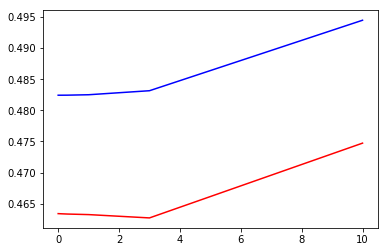

In [12]:
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.show()

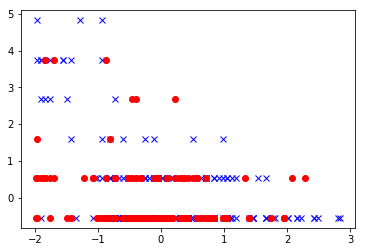

In [13]:
plt.plot(datain['train'].Age[y==0], datain['train'].SibSp[y==0], 'xb')
plt.plot(datain['train'].Age[y==1], datain['train'].SibSp[y==1], 'or')
plt.show()

In [25]:
tp = np.linspace(0.2, 0.7, 20)

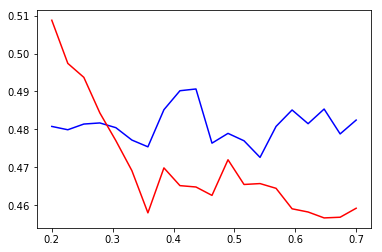

In [26]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    nfeature = X.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 3.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.show()